In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle
import copy

import pandas as pd
import time

from interpolate_over import InterpolateOverDefectGaussianProcess

#%matplotlib widget

In [2]:
dic = pickle.load(open("out_test_0.pkl", "rb"))
maskedImage = dic['in']['maskedImage']

treegp | cholesky | block


100%|██████████| 52/52 [00:03<00:00, 16.86it/s] 
/tmp/ipykernel_18264/3578572108.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'Solver': [s], 'Method': [m], 'Time': [execution_time]})], ignore_index=True)


time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 3.0864
treegp | cholesky | spanset


 22%|██▏       | 2/9 [00:00<00:02,  3.33it/s]

Problem size is too large to interpolate over. Skipping.
Problem size:  261170
xmin, xmax, ymin, ymax:  1096 1187 1305 4175
bbox:  (minimum=(1096, 1305), maximum=(1187, 4200))
Use interpolate_over_defects_block instead for this spanset.
block_size:  40



100%|██████████| 9/9 [00:06<00:00,  1.33it/s]


time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 6.7628
george | HODLR | block


100%|██████████| 52/52 [00:01<00:00, 31.84it/s] 


time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 1.6346
george | HODLR | spanset


  0%|          | 0/9 [00:00<?, ?it/s]

Problem size is too large to interpolate over. Skipping.
Problem size:  261170
xmin, xmax, ymin, ymax:  1096 1187 1305 4175
bbox:  (minimum=(1096, 1305), maximum=(1187, 4200))
Use interpolate_over_defects_block instead for this spanset.
block_size:  40



100%|██████████| 9/9 [00:01<00:00,  4.54it/s]


time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 1.9912
gpytorch | GPExact | block


100%|██████████| 52/52 [00:06<00:00,  8.32it/s]


time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 6.2895
gpytorch | GPExact | spanset


 22%|██▏       | 2/9 [00:00<00:02,  3.13it/s]

Problem size is too large to interpolate over. Skipping.
Problem size:  261170
xmin, xmax, ymin, ymax:  1096 1187 1305 4175
bbox:  (minimum=(1096, 1305), maximum=(1187, 4200))
Use interpolate_over_defects_block instead for this spanset.
block_size:  40



100%|██████████| 9/9 [00:11<00:00,  1.23s/it]


time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 11.0787


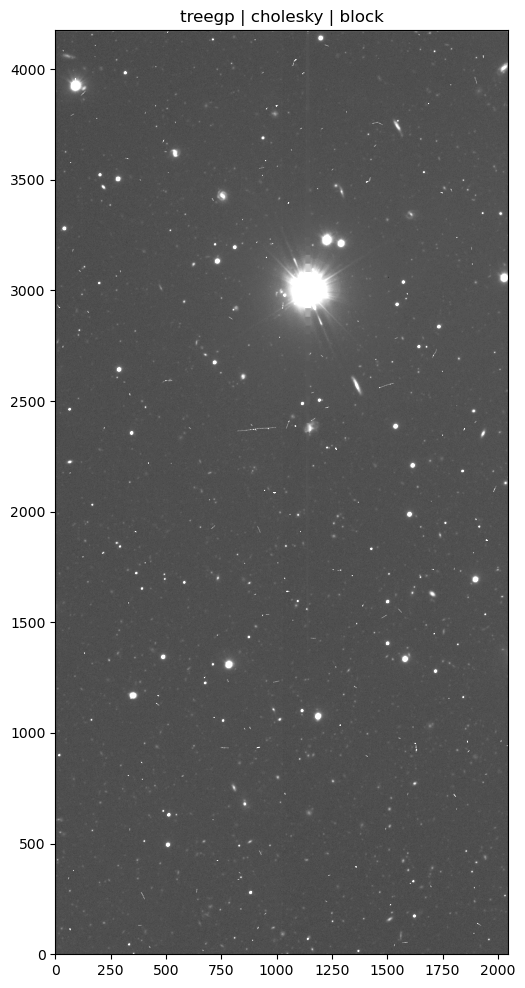

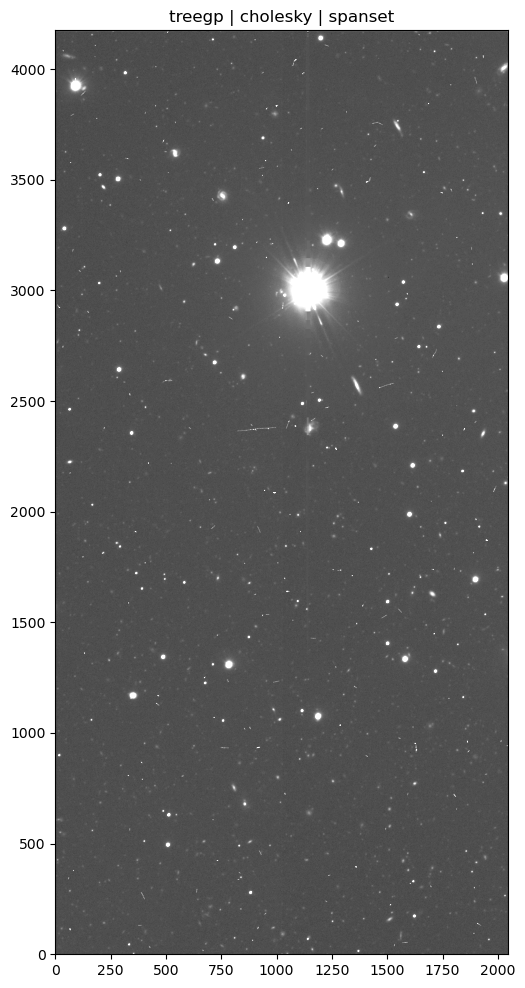

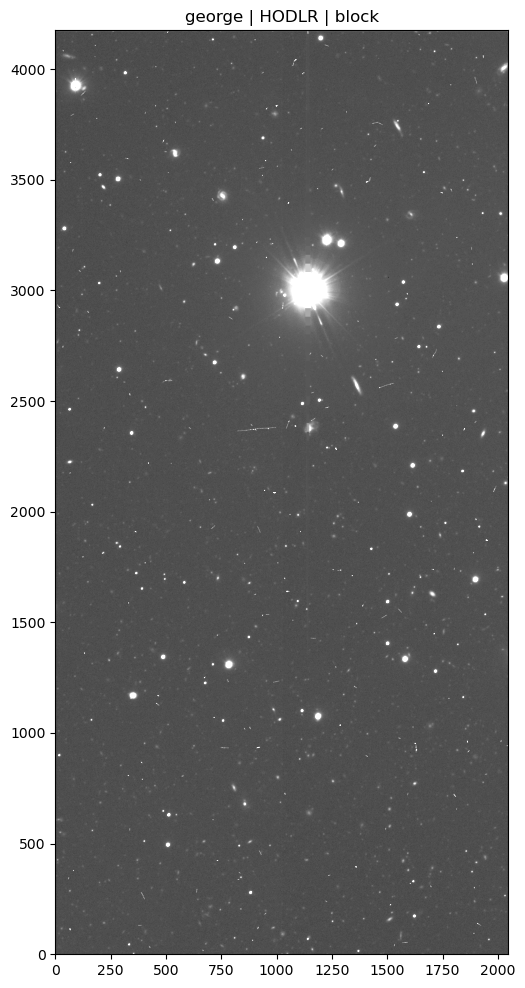

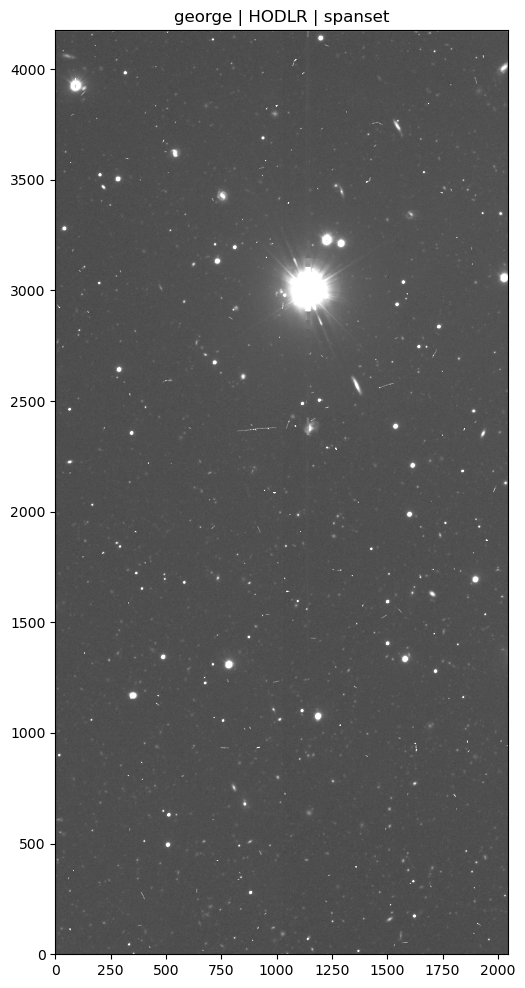

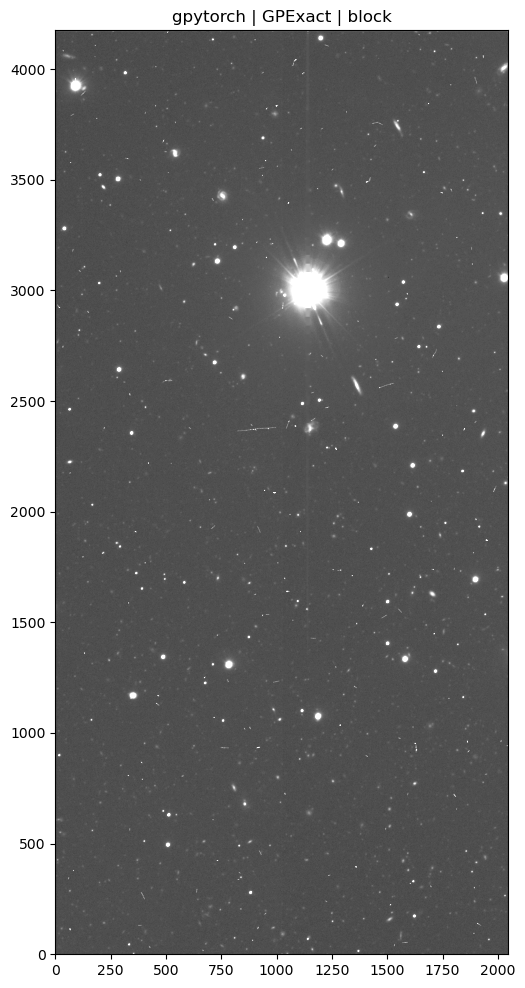

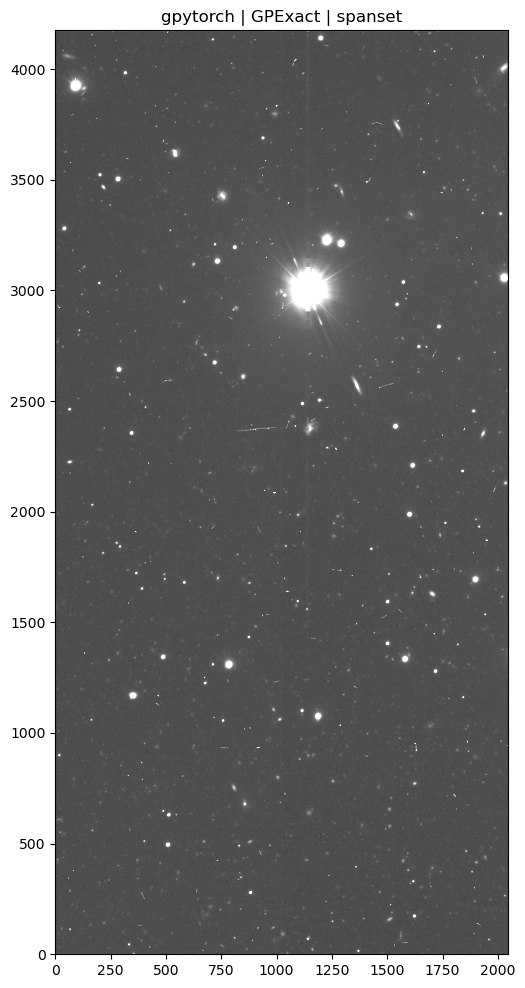

In [4]:
dic = pickle.load(open("out_test_0.pkl", "rb"))
maskedImage = dic['in']['maskedImage']

solvers = ['treegp', 'george', 'gpytorch']
solvers_method = ['cholesky', 'HODLR', 'GPExact']
methods = ['block', 'spanset']
# solvers = ['george']
# solvers_method = ['HODLR']
# methods = ['spanset']


# Create an empty dataframe to store the results
df = pd.DataFrame(columns=['Solver', 'Method', 'Time'])

for i, s in enumerate(solvers):
    for m in methods:
        print(f'{s} | {solvers_method[i]} | {m}')
        to_interpolate = copy.deepcopy(maskedImage)
        GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
                                                fwhm=5, block_size=40, solver=s,
                                                method=m)

        # Perform the interpolation and record the time for each solver and method
        start_time = time.time()
        GP.interpolate_over_defects()
        end_time = time.time()
        execution_time = end_time - start_time

        # Append the results to the dataframe
        df = pd.concat([df, pd.DataFrame({'Solver': [s], 'Method': [m], 'Time': [execution_time]})], ignore_index=True)

        plt.figure(figsize=(12, 12))
        plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
        plt.gca().invert_yaxis()
        plt.title(f'{s} | {solvers_method[i]} | {m}')
        plt.savefig(f'{s}_{solvers_method[i]}_{m}.png')

In [5]:
df

,Solver,Method,Time
0,treegp,block,3.086482
1,treegp,spanset,6.762811
2,george,block,1.634675
3,george,spanset,1.991186
4,gpytorch,block,6.289481
5,gpytorch,spanset,11.078718
